In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob

In [4]:
glob.glob(r"D:\Stock_Market_Analysis\S&P_resources\individual_stocks_5yr/*csv")

['D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\AAL_data.csv',
 'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\AAP_data.csv',
 'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\ABBV_data.csv',
 'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\ABC_data.csv',
 'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\ABT_data.csv',
 'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\ACN_data.csv',
 'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\ADBE_data.csv',
 'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\ADI_data.csv',
 'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\ADM_data.csv',
 'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\ADP_data.csv',
 'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\ADSK_data.csv',
 'D:\\Stock_

In [5]:
 len(glob.glob(r"D:\Stock_Market_Analysis\S&P_resources\individual_stocks_5yr/*csv"))

505

In [6]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
company_list = [
    r'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
    r'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
    r'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv',
    r'D:\\Stock_Market_Analysis\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv',

]

In [8]:
all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df], ignore_index = True)

In [9]:
all_data.shape

(4752, 7)

In [10]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


In [11]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

In [12]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [13]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [14]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [15]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

ANALYZING CHANGE IN PRICE OF THE STOCK OVERTIME

In [16]:
tech_list = all_data['Name'].unique()

In [17]:
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

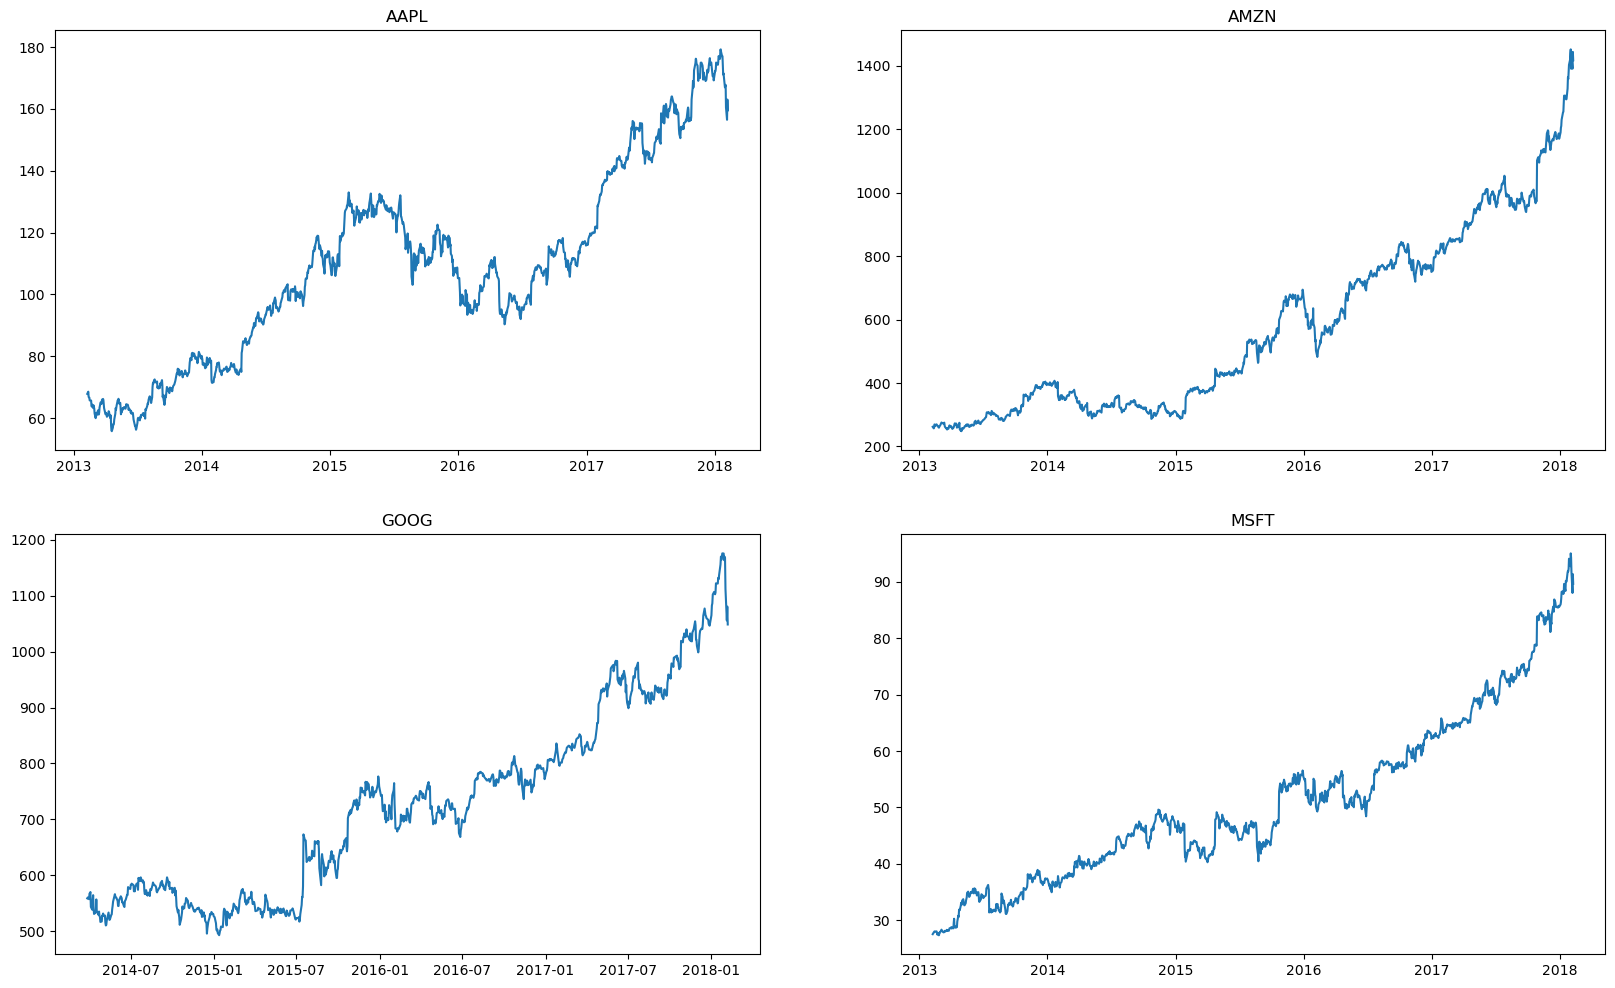

In [18]:
plt.figure(figsize = (20,12))
for index, company in enumerate(tech_list):
     plt.subplot(2,2,index+1)
     filter1 = all_data['Name'] == company # Creates a filter to select rows where Name == current company.
     df = all_data[filter1] #Extracts those rows into a new dataframe df.
     plt.plot(df['date'], df['close'])
     plt.title(company) 
     

MOVING AVERAGE OF THE VARIOUS STOCKS

moving avg is a way to smooth out stock price fluctuatuions and see the underlying trend
over time.

Instead of looking at the daily ups and downs , a moving avg gives you the avg closing
#price over a specific time window, like 7days, 20days,50 days,200days.

MOVING AVG
----> removes noice
----> highlights trends
----> helps woth buy/sell decisions


In [19]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [20]:
all_data['close'].rolling(window = 10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

✅ What .rolling() Does

rolling() creates a window of a certain size that moves across the data.
You can then apply functions like .mean(), .sum(), .std(), etc. to that window.

example : all_data['close'].rolling(window=20).mean()


In [21]:
new_data = all_data.copy()

In [22]:
ma_day = [10,20,50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [23]:
new_data

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4747,2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.8900,91.4750,85.2500,91.3300,67998564,MSFT,92.525,91.0535,87.4328


In [24]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4745,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [25]:
new_data.set_index('date',inplace= True)

In [26]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684


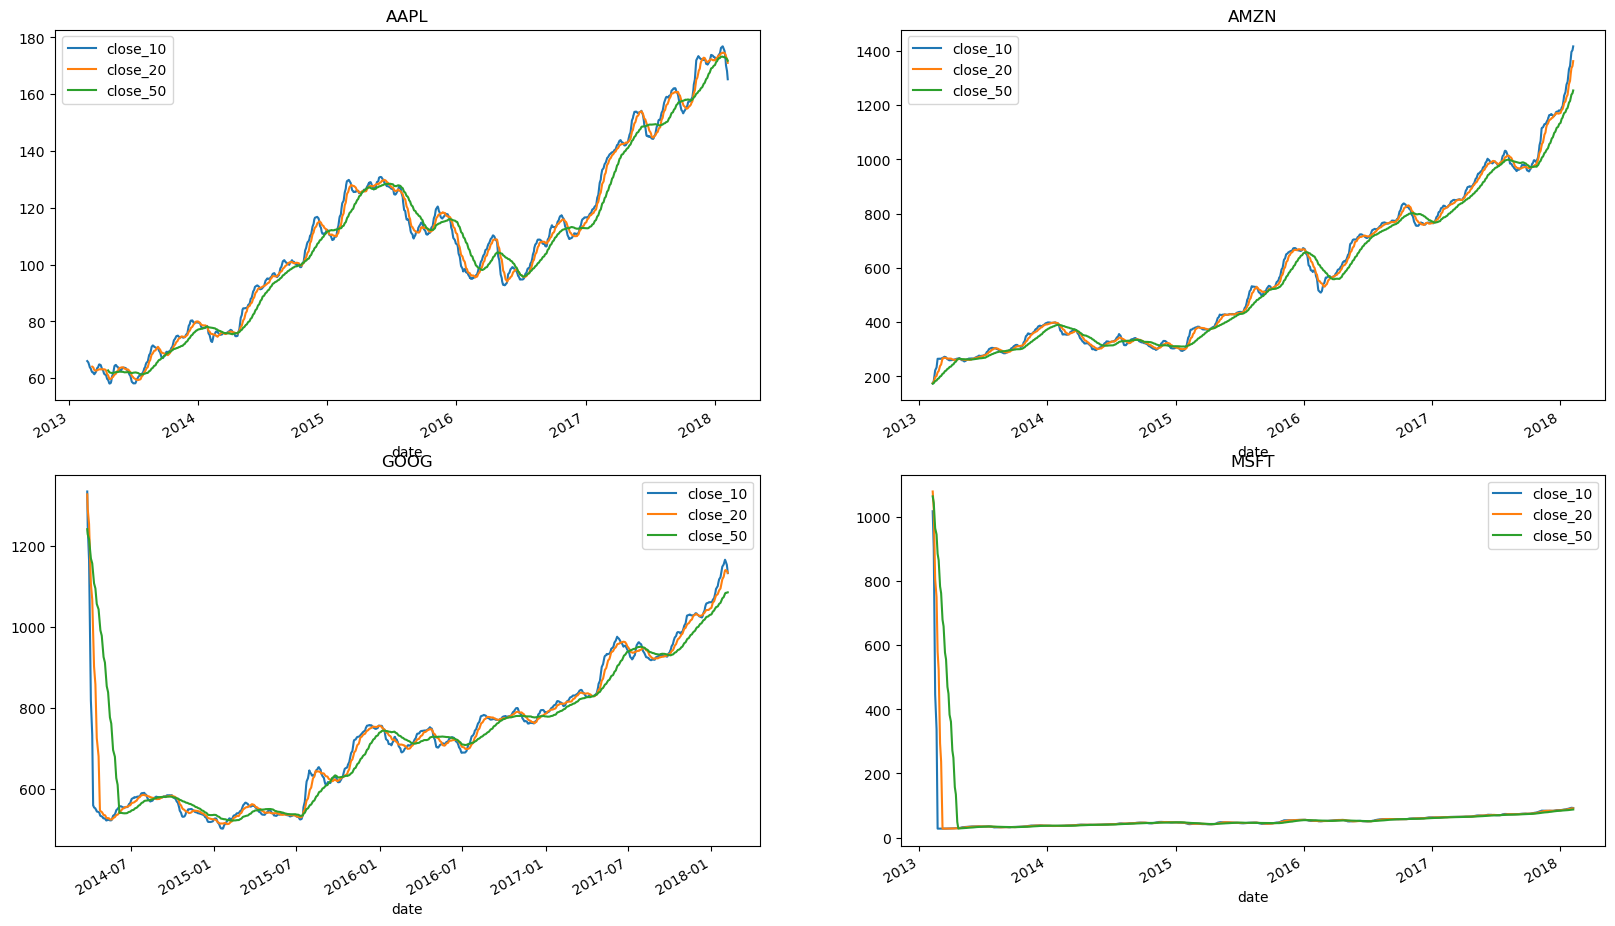

In [31]:
plt.figure(figsize =(20,12))
for index, company in enumerate(tech_list , 1):
    plt.subplot(2,2,index)
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    df[['close_10', 'close_20', 'close_50']].plot(ax = plt.gca())
    plt.title(company)

CLOSING PRICE CHANGE IN APPLE STOCK

In [32]:
company_list

['D:\\\\Stock_Market_Analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'D:\\\\Stock_Market_Analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'D:\\\\Stock_Market_Analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'D:\\\\Stock_Market_Analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [35]:
apple = pd.read_csv('D:\\\\Stock_Market_Analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv')

In [36]:
apple.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [37]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [41]:
apple['close'].pct_change() * 100
# pct_change() ---> percentage change btw the current and prior element. 

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: close, Length: 1259, dtype: float64

In [42]:
apple['Daily Returns (in %)'] = apple['close'].pct_change() * 100
apple.head(5)

,date,open,high,low,close,volume,Name,Daily Returns (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [43]:
import plotly.express as px

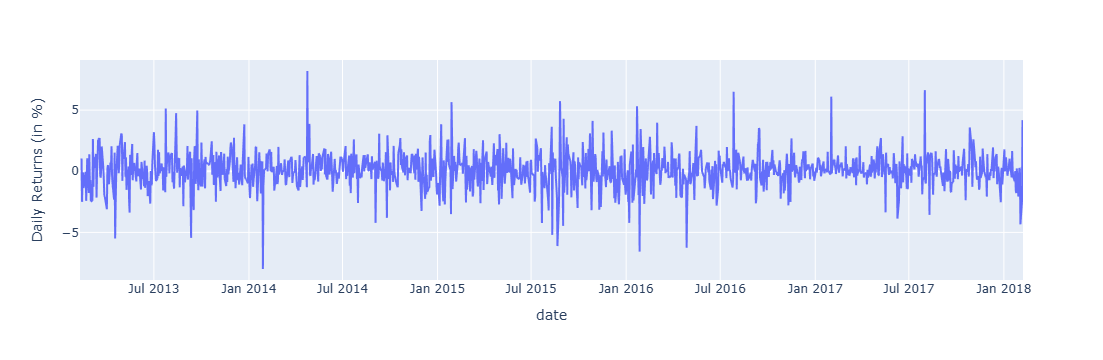

In [44]:
px.line(apple, x='date', y = 'Daily Returns (in %)' )

PERFORMING RESAMPLING ANALYSIS OF CLOSING PRICE

In [85]:
apple.dtypes

open                    float64
high                    float64
low                     float64
close                   float64
volume                    int64
Name                     object
Daily Returns (in %)    float64
dtype: object

In [86]:
apple['date'] = pd.to_datetime(apple['date'])



KeyError: 'date'

In [87]:
apple.index = pd.to_datetime(apple.index)


In [88]:
apple = apple.reset_index().rename(columns={'index': 'date'})


In [90]:
apple['date'] = pd.to_datetime(apple['date'])

In [91]:
apple.dtypes

date                    datetime64[ns]
open                           float64
high                           float64
low                            float64
close                          float64
volume                           int64
Name                            object
Daily Returns (in %)           float64
dtype: object

In [92]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily Returns (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [93]:
apple.set_index('date', inplace = True)

In [94]:
apple.head(4)

,open,high,low,close,volume,Name,Daily Returns (in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [95]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: ME, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

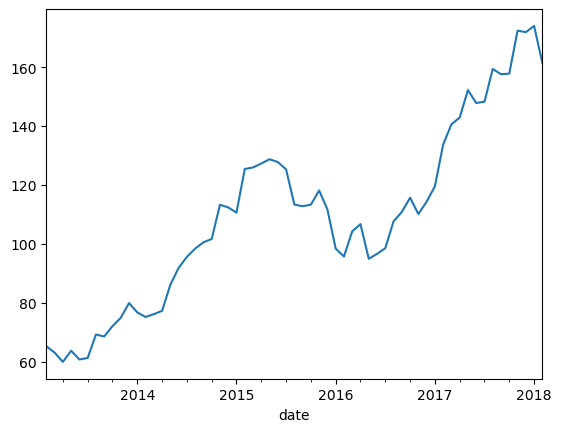

In [96]:
apple['close'].resample('M').mean().plot()

In [98]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: YE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

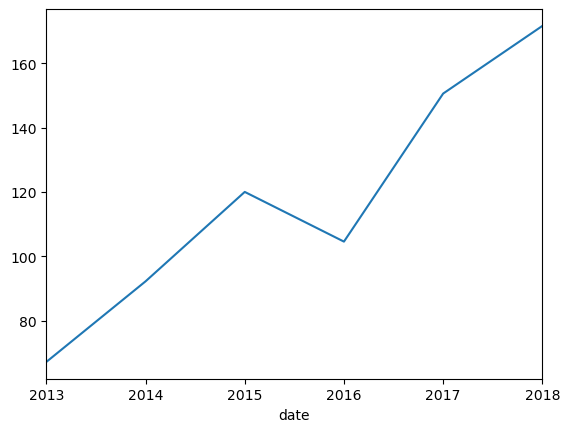

In [100]:
apple['close'].resample('Y').mean().plot()

In [101]:
apple['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: QE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

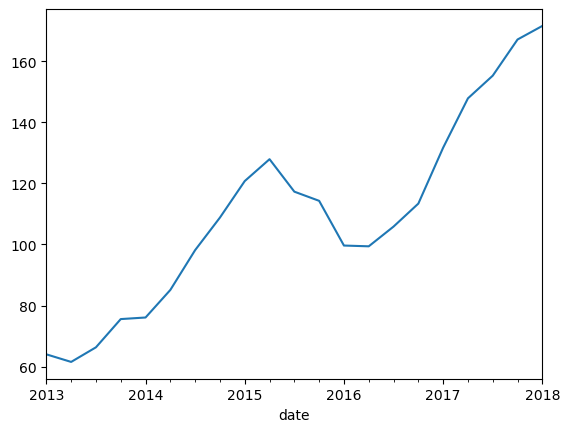

In [102]:
apple['close'].resample('Q').mean().plot()

CHECKING IF THE CLOSING PRICE OF THESE TECH COMPANIES (ALL 4) ARE CORRELATED OR NOT.

In [103]:
company_list

['D:\\\\Stock_Market_Analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'D:\\\\Stock_Market_Analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'D:\\\\Stock_Market_Analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'D:\\\\Stock_Market_Analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [104]:
company_list[0]

'D:\\\\Stock_Market_Analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv'

In [107]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [108]:
closing_price = pd.DataFrame()

In [109]:
app['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [112]:
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['goog_close'] = google['close']
closing_price['msft_close'] = msft['close']

In [113]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


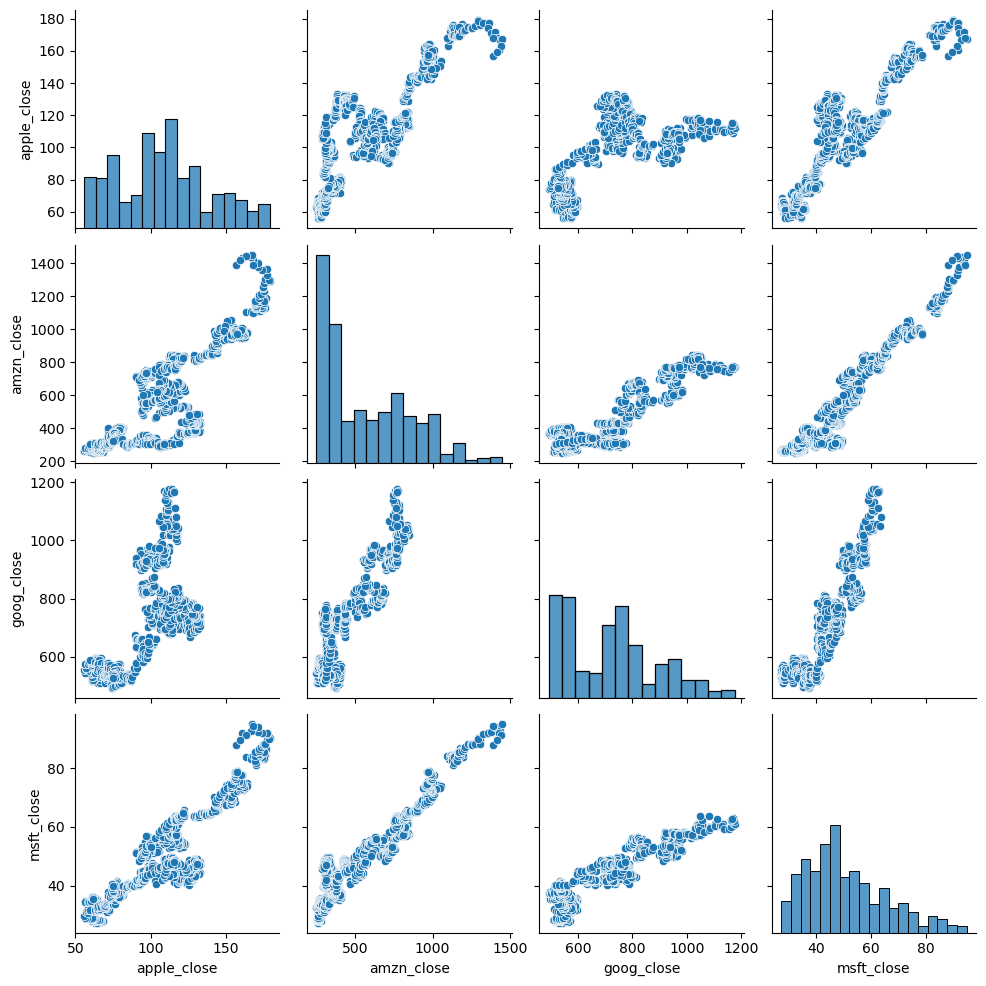

In [114]:
sns.pairplot(closing_price)

In [115]:
closing_price.corr()

,apple_close,amzn_close,goog_close,msft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
goog_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

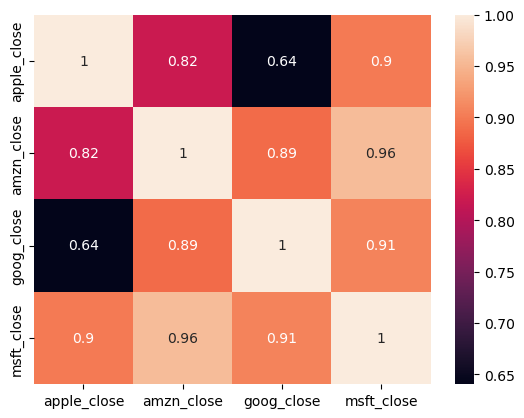

In [117]:
sns.heatmap(closing_price.corr(), annot = True)

LIGHTER THE COLOR ---> HIGHER THE CORRELATION

PERFORMING CO-RELATION ANALYSIS ---> PAIR GRID

In [118]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


In [119]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64